In [158]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [140]:
DATA_PATH = os.path.join('..', "data", "telco-customer-churn", "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(DATA_PATH)
print("Data_Loaded! Shape =", df.shape)


Data_Loaded! Shape = (7043, 21)


In [141]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [143]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# EDA

In [144]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

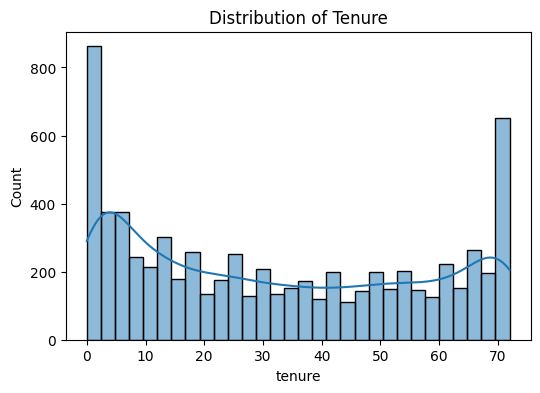

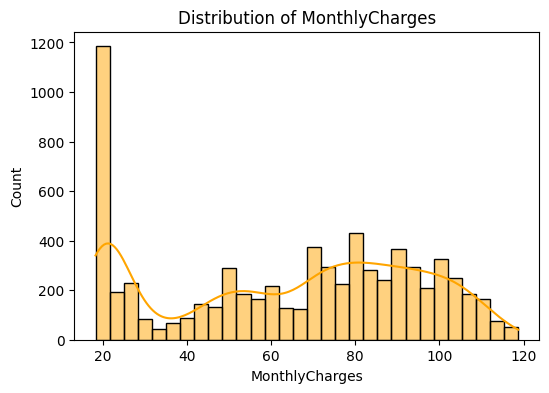

In [145]:
# tenure Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.show()

# MonthlyCharges Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color="orange")
plt.title("Distribution of MonthlyCharges")
plt.show()


In [146]:
# gender
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [147]:
# contract
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


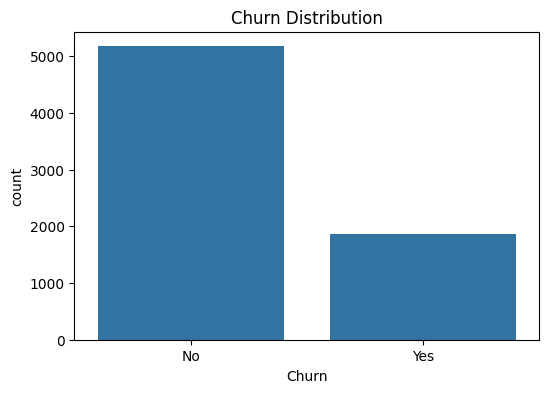

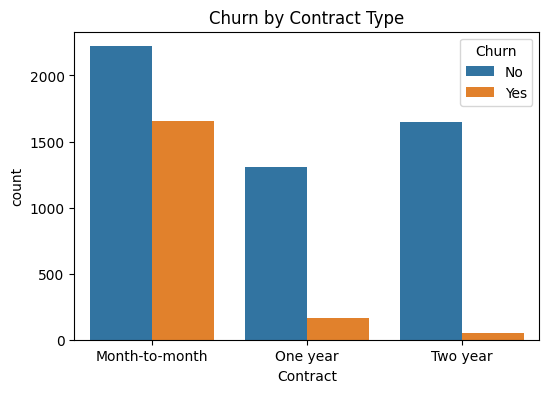

In [148]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


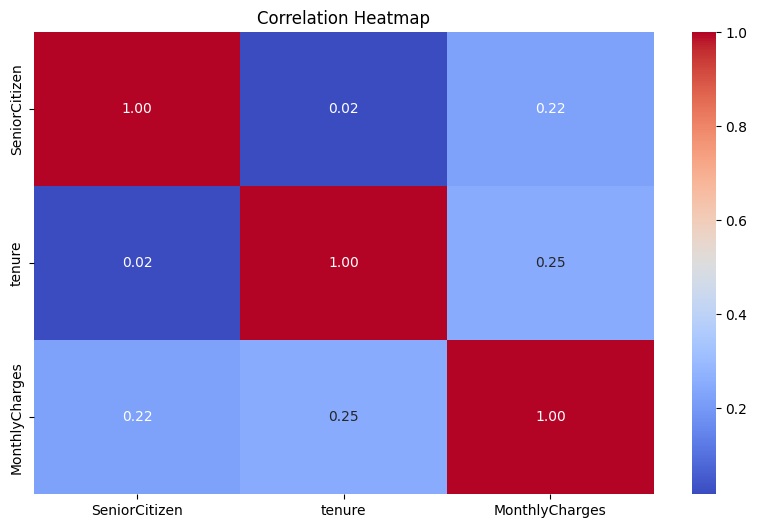

In [149]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [150]:
# Change TotalCharges Dtype to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# fill missing value with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [151]:
X = df.drop('Churn', axis=1) 
y = df['Churn'].map({'No': 0, 'Yes': 1})   # map Yes/No with 1/0

In [152]:
# Identify col type
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

# create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [153]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (5634, 20)
Test size: (1409, 20)


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8041163946061036


In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7899219304471257


In [156]:
from xgboost import XGBClassifier

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7849538679914834


In [157]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ]
})

print("Accuracy Comparison")
results


Accuracy Comparison


,Model,Accuracy
0,Logistic Regression,0.804116
1,Random Forest,0.789922
2,XGBoost,0.784954


# Model Evaluation

In [161]:
def evaluate_model(name, model, X_test, y_test, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(f"\n{name}")
    # Classification Report
    print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))
    
    # ROC-AUC
    y_proba = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {auc:.3f}")
    return auc


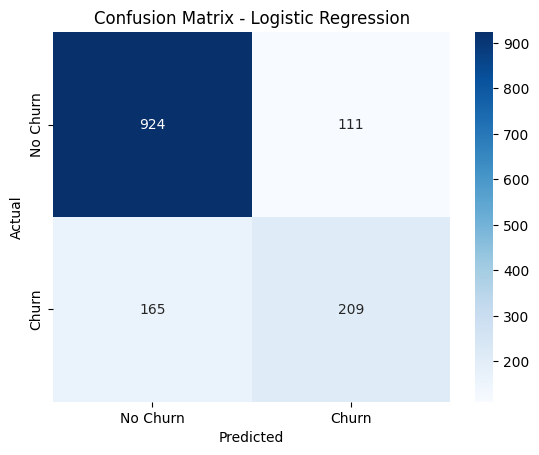


Logistic Regression
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

ROC-AUC: 0.842


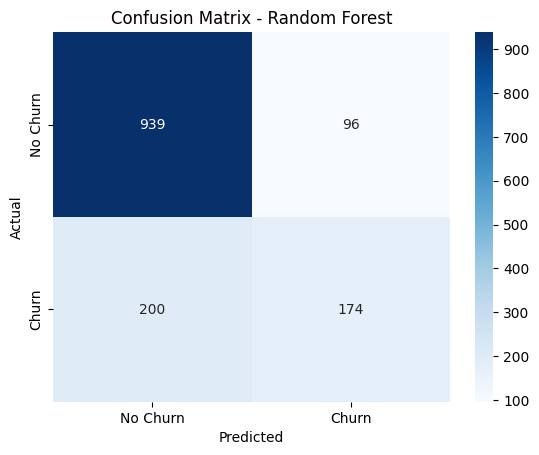


Random Forest
              precision    recall  f1-score   support

    No Churn       0.82      0.91      0.86      1035
       Churn       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.830


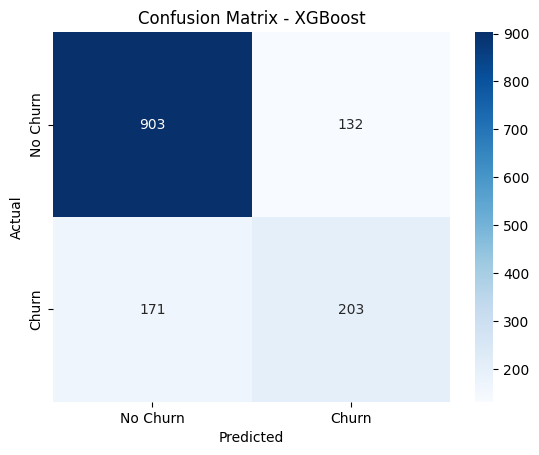


XGBoost
              precision    recall  f1-score   support

    No Churn       0.84      0.87      0.86      1035
       Churn       0.61      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.825


In [162]:
auc_lr = evaluate_model("Logistic Regression", log_reg, X_test, y_test, y_pred_lr)
auc_rf = evaluate_model("Random Forest", rf_clf, X_test, y_test, y_pred_rf)
auc_xgb = evaluate_model("XGBoost", xgb_clf, X_test, y_test, y_pred_xgb)

In [163]:
eval_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ],
    "ROC-AUC": [auc_lr, auc_rf, auc_xgb]
})

print("Model Evaluation Results")
eval_results


Model Evaluation Results


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.804116,0.841753
1,Random Forest,0.789922,0.830139
2,XGBoost,0.784954,0.825449


# Explainability

## Feature Importance

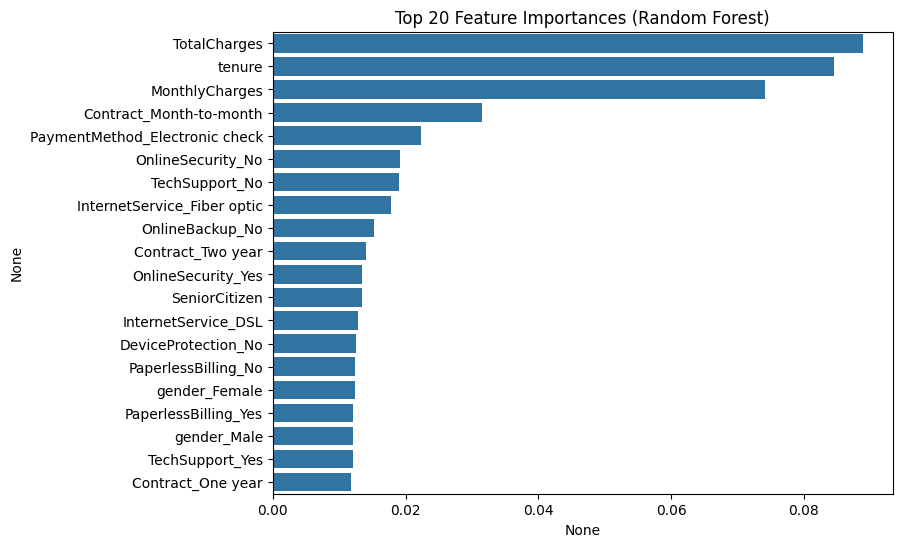

In [ ]:
# get model from pipeline
rf_model = rf_clf.named_steps["model"]

# get feature names after OneHotEncoder
ohe = rf_clf.named_steps["preprocessor"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(cat_features)

# Plot Feature Importance
importances = rf_model.feature_importances_
fi = pd.Series(importances, index=all_features).sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=fi, y=fi.index)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

<Figure size 800x600 with 0 Axes>

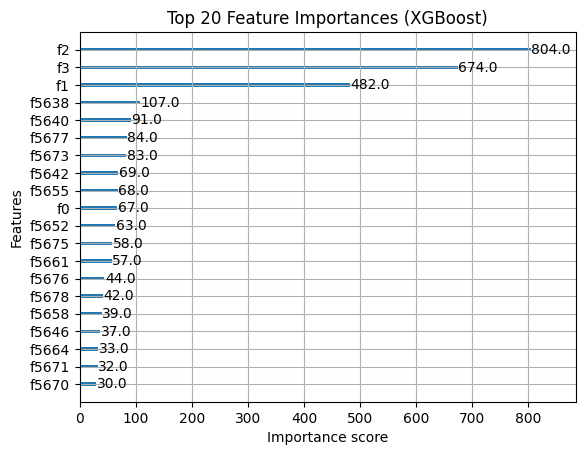

In [165]:
xgb_model = xgb_clf.named_steps["model"]

from xgboost import plot_importance
plt.figure(figsize=(8,6))
plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

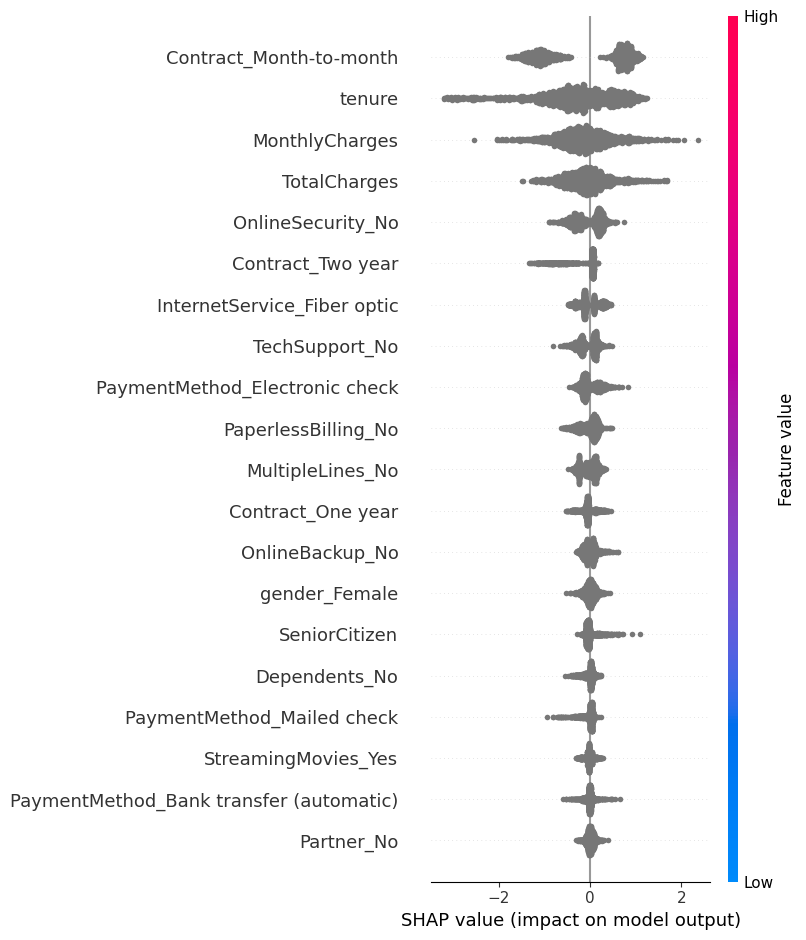

In [ ]:
import shap

# XGBoost with SHAP
explainer = shap.TreeExplainer(xgb_model)
X_transformed = xgb_clf.named_steps["preprocessor"].transform(X_test)
shap_values = explainer.shap_values(X_transformed)

# Summary Plot
shap.summary_plot(shap_values, X_transformed, feature_names=all_features)

In [ ]:
import json
import joblib

# get best model
best_row = eval_results.sort_values('ROC-AUC', ascending=False).iloc[0]
best_name = best_row['Model']
model_map = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf
}
best_model = model_map[best_name]

# save model
joblib.dump(best_model, '../models/churn_model.pkl')

# save metadata (name + feature list)
meta = {
    'best_model': best_name,
    'features': list(X.columns)
}
with open('../models/model_meta.json', 'w', encoding='utf-8') as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

# predicted file
proba = best_model.predict_proba(X_test)[:, 1]
pred_df = X_test.copy()
pred_df['Churn_actual'] = y_test.values
pred_df['Churn_proba'] = proba
pred_df['Churn_pred'] = (pred_df['Churn_proba'] >= 0.5).astype(int)

pred_df.to_csv('../outputs/predictions.csv', index=False)

print("Saved ../models/churn_model.pkl")
print("Saved ../models/model_meta.json")
print("Saved ../outputs/predictions.csv  (cols: features + Churn_actual + Churn_proba + Churn_pred)")

Saved ../models/churn_model.pkl
Saved ../models/model_meta.json
Saved ../outputs/predictions.csv  (cols: features + Churn_actual + Churn_proba + Churn_pred)
